To run this, press "*Runtime*" and press "*Run all*" on a **free** Tesla T4 Google Colab instance!
<div class="align-center">
<a href="https://unsloth.ai/"><img src="https://github.com/unslothai/unsloth/raw/main/images/unsloth%20new%20logo.png" width="115"></a>
<a href="https://discord.gg/unsloth"><img src="https://github.com/unslothai/unsloth/raw/main/images/Discord button.png" width="145"></a>
<a href="https://docs.unsloth.ai/"><img src="https://github.com/unslothai/unsloth/blob/main/images/documentation%20green%20button.png?raw=true" width="125"></a></a> Join Discord if you need help + ⭐ <i>Star us on <a href="https://github.com/unslothai/unsloth">Github</a> </i> ⭐
</div>

To install Unsloth on your own computer, follow the installation instructions on our Github page [here](https://docs.unsloth.ai/get-started/installing-+-updating).

You will learn how to do [data prep](#Data), how to [train](#Train), how to [run the model](#Inference), & [how to save it](#Save)


### News


Unsloth's [Docker image](https://hub.docker.com/r/unsloth/unsloth) is here! Start training with no setup & environment issues. [Read our Guide](https://docs.unsloth.ai/new/how-to-train-llms-with-unsloth-and-docker).

[gpt-oss RL](https://docs.unsloth.ai/new/gpt-oss-reinforcement-learning) is now supported with the fastest inference & lowest VRAM. Try our [new notebook](https://colab.research.google.com/github/unslothai/notebooks/blob/main/nb/gpt-oss-(20B)-GRPO.ipynb) which creates kernels!

Introducing [Vision](https://docs.unsloth.ai/new/vision-reinforcement-learning-vlm-rl) and [Standby](https://docs.unsloth.ai/basics/memory-efficient-rl) for RL! Train Qwen, Gemma etc. VLMs with GSPO - even faster with less VRAM.

Unsloth now supports Text-to-Speech (TTS) models. Read our [guide here](https://docs.unsloth.ai/basics/text-to-speech-tts-fine-tuning).

Visit our docs for all our [model uploads](https://docs.unsloth.ai/get-started/all-our-models) and [notebooks](https://docs.unsloth.ai/get-started/unsloth-notebooks).


### Installation

In [1]:
%%capture
import os, re
if "COLAB_" not in "".join(os.environ.keys()):
    !pip install unsloth
else:
    # Do this only in Colab notebooks! Otherwise use pip install unsloth
    import torch; v = re.match(r"[0-9\.]{3,}", str(torch.__version__)).group(0)
    xformers = "xformers==" + ("0.0.32.post2" if v == "2.8.0" else "0.0.29.post3")
    !pip install --no-deps bitsandbytes accelerate {xformers} peft trl triton cut_cross_entropy unsloth_zoo
    !pip install sentencepiece protobuf "datasets>=3.4.1,<4.0.0" "huggingface_hub>=0.34.0" hf_transfer
    !pip install --no-deps unsloth
!pip install transformers==4.57.0
!pip install --no-deps trl==0.22.2

In [10]:
!pip uninstall unsloth unsloth_zoo -y
!pip install --upgrade --no-cache-dir "unsloth[colab-new] @ git+https://github.com/unslothai/unsloth.git"
!pip install --upgrade --no-cache-dir "git+https://github.com/unslothai/unsloth-zoo.git"


Found existing installation: unsloth 2025.10.2
Uninstalling unsloth-2025.10.2:
  Successfully uninstalled unsloth-2025.10.2
Found existing installation: unsloth_zoo 2025.10.2
Uninstalling unsloth_zoo-2025.10.2:
  Successfully uninstalled unsloth_zoo-2025.10.2
  Cloning https://github.com/unslothai/unsloth.git to /tmp/pip-install-bux2ccyh/unsloth_211ae62f3ea0463f8584c5b733428eef
  Running command git clone --filter=blob:none --quiet https://github.com/unslothai/unsloth.git /tmp/pip-install-bux2ccyh/unsloth_211ae62f3ea0463f8584c5b733428eef

  Resolved https://github.com/unslothai/unsloth.git to commit 3d98df6e0f7da49437731eadd5bde767fc1b20af
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 168.7 MB/s  0:00:00
  Created wheel for unsloth: filename=unsloth-2025.10.3-py3-none-any.whl size=338293 sha256=2b358519ca27df4cbd7fd406bee240537f310504746daaff

### Unsloth

In [2]:
from unsloth import FastVisionModel # FastLanguageModel for LLMs
import torch

# 4bit pre quantized models we support for 4x faster downloading + no OOMs.
fourbit_models = [
    "unsloth/Llama-3.2-11B-Vision-Instruct-bnb-4bit", # Llama 3.2 vision support
    "unsloth/Llama-3.2-11B-Vision-bnb-4bit",
    "unsloth/Llama-3.2-90B-Vision-Instruct-bnb-4bit", # Can fit in a 80GB card!
    "unsloth/Llama-3.2-90B-Vision-bnb-4bit",

    "unsloth/Pixtral-12B-2409-bnb-4bit",              # Pixtral fits in 16GB!
    "unsloth/Pixtral-12B-Base-2409-bnb-4bit",         # Pixtral base model

    "unsloth/Qwen2-VL-2B-Instruct-bnb-4bit",          # Qwen2 VL support
    "unsloth/Qwen2-VL-7B-Instruct-bnb-4bit",
    "unsloth/Qwen2-VL-72B-Instruct-bnb-4bit",

    "unsloth/llava-v1.6-mistral-7b-hf-bnb-4bit",      # Any Llava variant works!
    "unsloth/llava-1.5-7b-hf-bnb-4bit",
] # More models at https://huggingface.co/unsloth

model, tokenizer = FastVisionModel.from_pretrained(
    "unsloth/Qwen3-VL-4B-Instruct-unsloth-bnb-4bit",
    load_in_4bit = True, # Use 4bit to reduce memory use. False for 16bit LoRA.
    use_gradient_checkpointing = "unsloth", # True or "unsloth" for long context
)

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.


Skipping import of cpp extensions due to incompatible torch version 2.8.0+cu128 for torchao version 0.14.0         Please see GitHub issue #2919 for more info


🦥 Unsloth Zoo will now patch everything to make training faster!
==((====))==  Unsloth 2025.10.3: Fast Qwen3_Vl patching. Transformers: 4.57.0.
   \\   /|    Tesla T4. Num GPUs = 1. Max memory: 14.741 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.8.0+cu128. CUDA: 7.5. CUDA Toolkit: 12.8. Triton: 3.4.0
\        /    Bfloat16 = FALSE. FA [Xformers = 0.0.32.post2. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors:   0%|          | 0.00/4.30G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/213 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/782 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/707 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/614 [00:00<?, ?B/s]

chat_template.jinja: 0.00B [00:00, ?B/s]

video_preprocessor_config.json:   0%|          | 0.00/817 [00:00<?, ?B/s]

We now add LoRA adapters for parameter efficient finetuning - this allows us to only efficiently train 1% of all parameters.

**[NEW]** We also support finetuning ONLY the vision part of the model, or ONLY the language part. Or you can select both! You can also select to finetune the attention or the MLP layers!

In [3]:
model = FastVisionModel.get_peft_model(
    model,
    finetune_vision_layers     = True, # False if not finetuning vision layers
    finetune_language_layers   = True, # False if not finetuning language layers
    finetune_attention_modules = True, # False if not finetuning attention layers
    finetune_mlp_modules       = True, # False if not finetuning MLP layers

    r = 16,           # The larger, the higher the accuracy, but might overfit
    lora_alpha = 16,  # Recommended alpha == r at least
    lora_dropout = 0,
    bias = "none",
    random_state = 3407,
    use_rslora = False,  # We support rank stabilized LoRA
    loftq_config = None, # And LoftQ
    # target_modules = "all-linear", # Optional now! Can specify a list if needed
)

<a name="Data"></a>
### Data Prep
We'll be using the CROHME (Competition on Recognition of Online Handwritten Mathematical Expressions) dataset. The goal is to convert handwritten mathematical expressions into **label graphs** - structured representations showing symbols and their spatial relationships.

The CROHME dataset contains:
- **InkML files**: Handwritten stroke data (X, Y coordinates)
- **Label graphs**: Symbols with spatial relationships (Right, Sup, Sub, Above, Below, Inside, NoRel, etc.)

We'll parse the InkML files, render the strokes as images, and use the label graphs as training targets.

In [4]:
# Helper functions for loading and processing CROHME dataset
import xml.etree.ElementTree as ET
from PIL import Image, ImageDraw
import os
import re

def parse_inkml(file_path):
    """
    Parse an InkML file to extract strokes and LaTeX ground truth.
    
    Args:
        file_path: Path to the InkML file
    
    Returns:
        tuple: (strokes, latex) where strokes is a list of stroke coordinates
               and latex is the ground truth LaTeX string
    """
    try:
        tree = ET.parse(file_path)
        root = tree.getroot()
        
        # Define namespace
        ns = {'ink': 'http://www.w3.org/2003/InkML'}
        
        # Extract LaTeX ground truth
        latex = None
        for annotation in root.findall('.//ink:annotation[@type="truth"]', ns):
            latex = annotation.text
            if latex:
                # Remove $ signs if present
                latex = latex.strip()
                if latex.startswith('$') and latex.endswith('$'):
                    latex = latex[1:-1]
                break
        
        # Extract strokes
        strokes = []
        for trace in root.findall('.//ink:trace', ns):
            if trace.text:
                points = []
                coords = trace.text.strip().split(',')
                for coord in coords:
                    parts = coord.strip().split()
                    if len(parts) >= 2:
                        try:
                            x, y = float(parts[0]), float(parts[1])
                            points.append((x, y))
                        except ValueError:
                            continue
                if points:
                    strokes.append(points)
        
        return strokes, latex
    except Exception as e:
        print(f"Error parsing {file_path}: {e}")
        return None, None

def render_inkml_to_image(strokes, img_width=800, img_height=200, padding=10):
    """
    Render InkML strokes as a PIL Image.
    
    Args:
        strokes: List of strokes, where each stroke is a list of (x, y) coordinates
        img_width: Target image width
        img_height: Target image height
        padding: Padding around the strokes
    
    Returns:
        PIL.Image: Rendered image with white background and black strokes
    """
    if not strokes:
        return Image.new('RGB', (img_width, img_height), 'white')
    
    # Find bounding box
    all_x = [x for stroke in strokes for x, y in stroke]
    all_y = [y for stroke in strokes for x, y in stroke]
    
    if not all_x or not all_y:
        return Image.new('RGB', (img_width, img_height), 'white')
    
    min_x, max_x = min(all_x), max(all_x)
    min_y, max_y = min(all_y), max(all_y)
    
    # Calculate scaling to fit in target size with padding
    width = max_x - min_x
    height = max_y - min_y
    
    if width == 0 or height == 0:
        return Image.new('RGB', (img_width, img_height), 'white')
    
    scale_x = (img_width - 2 * padding) / width
    scale_y = (img_height - 2 * padding) / height
    scale = min(scale_x, scale_y)
    
    # Create image
    img = Image.new('RGB', (img_width, img_height), 'white')
    draw = ImageDraw.Draw(img)
    
    # Draw strokes
    for stroke in strokes:
        if len(stroke) < 2:
            continue
        
        # Normalize and scale coordinates
        normalized_stroke = [
            (
                (x - min_x) * scale + padding,
                (y - min_y) * scale + padding
            )
            for x, y in stroke
        ]
        
        # Draw lines between consecutive points
        for i in range(len(normalized_stroke) - 1):
            draw.line(
                [normalized_stroke[i], normalized_stroke[i + 1]],
                fill='black',
                width=2
            )
    
    return img

def load_crohme_dataset(txt_file, base_path="CROHME"):
    """
    Load CROHME dataset from a text file with label graphs.
    
    Args:
        txt_file: Path to the text file (e.g., 'CROHME/crohme2019_train.txt')
                  Format: path/to/file.inkml<TAB>label_graph
        base_path: Base directory containing the CROHME data
    
    Returns:
        list: List of dictionaries with 'image' and 'text' keys
              where 'text' contains the label graph representation
    """
    dataset = []
    
    with open(txt_file, 'r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()
            if not line:
                continue
            
            # Parse line: "path/to/file.inkml\tlabel_graph"
            parts = line.split('\t')
            if len(parts) != 2:
                # Skip lines without label graph
                continue
            
            inkml_path, label_graph = parts
            full_path = os.path.join(base_path, inkml_path)
            
            # Check if file exists
            if not os.path.exists(full_path):
                continue
            
            # Parse InkML file to get strokes (we don't need LaTeX anymore)
            strokes, _ = parse_inkml(full_path)
            
            if strokes and label_graph:
                # Render strokes to image
                image = render_inkml_to_image(strokes)
                
                dataset.append({
                    'image': image,
                    'text': label_graph  # Use label graph instead of LaTeX
                })
    
    print(f"Loaded {len(dataset)} samples from {txt_file}")
    return dataset

### Loading CROHME Dataset with Label Graphs

The CROHME dataset structure:
- **Training set**: ~8,900 samples in `crohme2019_train.txt`
- **Validation set**: ~987 samples in `crohme2019_valid.txt`
- **Test set**: Available in `crohme2019_test.txt`

Each text file contains:
- **Column 1**: Path to InkML file (handwritten stroke data)
- **Column 2**: Label graph (symbols and spatial relationships)

**Label Graph Format**: `symbol1 Relationship1 symbol2 Relationship2 ...`

**Relationships**: `Right`, `Sup` (superscript), `Sub` (subscript), `Above`, `Below`, `Inside`, `NoRel`, `COMMA`, etc.

**Example**: `x Sup 2 NoRel + Right y` represents x²+y

We'll load the training, validation, and test sets with their label graphs.

In [5]:
# Load CROHME training dataset
dataset = load_crohme_dataset("CROHME/crohme2019_train.txt", base_path="CROHME/crohme2019")
print(f"Training dataset size: {len(dataset)} samples")

# Load validation dataset for evaluation during training
valid_dataset = load_crohme_dataset("CROHME/crohme2019_valid.txt", base_path="CROHME/crohme2019")
print(f"Validation dataset size: {len(valid_dataset)} samples")

# Load test dataset for final evaluation
test_dataset = load_crohme_dataset("CROHME/crohme2019_test.txt", base_path="CROHME/crohme2019")
print(f"Test dataset size: {len(test_dataset)} samples")

Loaded 8900 samples from CROHME/crohme2019_train.txt
Training dataset size: 8900 samples
Loaded 986 samples from CROHME/crohme2019_valid.txt
Validation dataset size: 986 samples
Loaded 1198 samples from CROHME/crohme2019_test.txt
Test dataset size: 1198 samples


Let's take an overview look at the dataset. We shall see what the 3rd image is, and what label graph representation it has.

In [7]:
print(f"Dataset contains {len(dataset)} samples")
print(f"Sample keys: {list(dataset[0].keys())}")

Dataset contains 8900 samples
Sample keys: ['image', 'text']


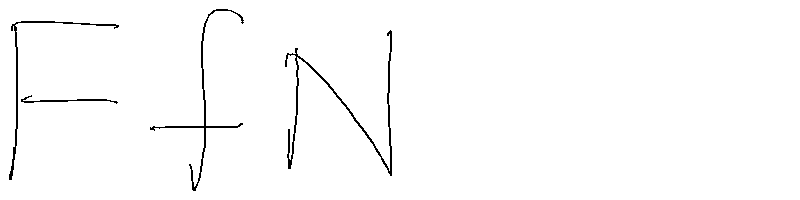

In [8]:
dataset[2]["image"]

In [9]:
dataset[2]["text"]

'F Right f Right N'

We can also render the LaTeX in the browser directly!

In [10]:
from IPython.display import display, Math, Latex

latex = dataset[2]["text"]
display(Math(latex))

<IPython.core.display.Math object>

To format the dataset, all vision finetuning tasks should be formatted as follows:

```python
[
{ "role": "user",
  "content": [{"type": "text",  "text": Q}, {"type": "image", "image": image} ]
},
{ "role": "assistant",
  "content": [{"type": "text",  "text": A} ]
},
]
```

In [6]:
# Instruction for label graph generation
# Label graph format: symbol1 Relationship1 symbol2 Relationship2 ...
# Relationships: Right, Sup, Sub, Above, Below, Inside, NoRel, COMMA, etc.
instruction = "Convert this handwritten mathematical expression to a label graph. Output the symbols and their spatial relationships in sequence. NO explantion"

def convert_to_conversation(sample):
    conversation = [
        { "role": "user",
          "content" : [
            {"type" : "text",  "text"  : instruction},
            {"type" : "image", "image" : sample["image"]} ]
        },
        { "role" : "assistant",
          "content" : [
            {"type" : "text",  "text"  : sample["text"]} ]  # Label graph from dataset
        },
    ]
    return { "messages" : conversation }
pass

Let's convert the dataset into the "correct" format for finetuning:

In [7]:
# Convert training dataset to conversation format
converted_dataset = [convert_to_conversation(sample) for sample in dataset]
print(f"Converted {len(converted_dataset)} training samples")

# Convert validation dataset to conversation format
converted_valid_dataset = [convert_to_conversation(sample) for sample in valid_dataset]
print(f"Converted {len(converted_valid_dataset)} validation samples")

Converted 8900 training samples
Converted 986 validation samples


We look at how the conversations are structured for the first example:

In [8]:
converted_dataset[0]

{'messages': [{'role': 'user',
   'content': [{'type': 'text',
     'text': 'Convert this handwritten mathematical expression to a label graph. Output the symbols and their spatial relationships in sequence. NO explantion'},
    {'type': 'image',
     'image': <PIL.Image.Image image mode=RGB size=800x200>}]},
  {'role': 'assistant',
   'content': [{'type': 'text',
     'text': 'f Sup \\prime NoRel ( Right x Right ) Right = NoRel 1 NoRel - Below 2 Right \\sqrt Inside x'}]}]}

<a name="Train"></a>
### Train the model
Now let's train our model on the CROHME dataset. We do 60 steps to speed things up, but you can set `num_train_epochs=1` for a full run, and turn off `max_steps=None`. We also support TRL's `DPOTrainer`!

**Note for CROHME**: The dataset has ~8,900 training samples. With batch_size=2 and gradient_accumulation_steps=4, each step processes 8 samples. For a full epoch, you would need ~1,112 steps. Adjust `max_steps` or use `num_train_epochs` accordingly.

We use our new `UnslothVisionDataCollator` which will help in our vision finetuning setup.

In [9]:
from unsloth.trainer import UnslothVisionDataCollator
from trl import SFTTrainer, SFTConfig

FastVisionModel.for_training(model) # Enable for training!

trainer = SFTTrainer(
    model = model,
    tokenizer = tokenizer,
    data_collator = UnslothVisionDataCollator(model, tokenizer), # Must use!
    train_dataset = converted_dataset,
    eval_dataset = converted_valid_dataset,  # Add validation dataset
    args = SFTConfig(
        per_device_train_batch_size = 2,
        gradient_accumulation_steps = 4,
        warmup_steps = 5,
        num_train_epochs = 1, # Set this instead of max_steps for full training runs
        learning_rate = 2e-4,
        logging_steps = 20,
        optim = "adamw_8bit",
        weight_decay = 0.01,
        lr_scheduler_type = "linear",
        seed = 3407,
        output_dir = "outputs",
        report_to = "none",     # For Weights and Biases
        
        # Evaluation settings
        eval_strategy = "steps",  # Evaluate during training
        eval_steps = 20,  # Evaluate every 20 steps
        per_device_eval_batch_size = 2,
        
        # You MUST put the below items for vision finetuning:
        remove_unused_columns = False,
        dataset_text_field = "",
        dataset_kwargs = {"skip_prepare_dataset": True},
        max_length = 2048,
    ),
)

Unsloth: Model does not have a default image size - using 512


In [ ]:
from transformers import EarlyStoppingCallback
import matplotlib.pyplot as plt
import os

# --- (1) Recommended: enable best-checkpoint restore + early stopping ---
trainer.args.load_best_model_at_end = True
trainer.args.metric_for_best_model = "eval_loss"
trainer.args.greater_is_better = False
trainer.add_callback(EarlyStoppingCallback(
    early_stopping_patience=3,
    early_stopping_threshold=0.0,
))

# --- (2) Train ---
train_result = trainer.train()
trainer.save_model()

# --- (3) Extract logs and plot train/eval loss ---
logs = trainer.state.log_history

train_points = [(e.get("step", i), e["loss"]) for i, e in enumerate(logs) if "loss" in e]
eval_points  = [(e.get("step", i), e["eval_loss"]) for i, e in enumerate(logs) if "eval_loss" in e]

# Sort by step (just in case)
train_points.sort(key=lambda x: x[0])
eval_points.sort(key=lambda x: x[0])

train_steps, train_loss = zip(*train_points) if train_points else ([], [])
eval_steps, eval_loss   = zip(*eval_points)  if eval_points  else ([], [])

plt.figure(figsize=(7,5))
if train_steps:
    plt.plot(train_steps, train_loss, label="train_loss")
if eval_steps:
    plt.plot(eval_steps, eval_loss, label="eval_loss")

plt.xlabel("global_step")
plt.ylabel("loss")
plt.title("Training vs Validation Loss")
plt.legend()
os.makedirs("outputs", exist_ok=True)
plt.savefig("outputs/loss_curve.png", dpi=150, bbox_inches="tight")
plt.show()


The tokenizer has new PAD/BOS/EOS tokens that differ from the model config and generation config. The model config and generation config were aligned accordingly, being updated with the tokenizer's values. Updated tokens: {'bos_token_id': None}.
The model is already on multiple devices. Skipping the move to device specified in `args`.
==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 8,900 | Num Epochs = 1 | Total steps = 1,113
O^O/ \_/ \    Batch size per device = 2 | Gradient accumulation steps = 4
\        /    Data Parallel GPUs = 1 | Total batch size (2 x 4 x 1) = 8
 "-____-"     Trainable parameters = 39,321,600 of 4,477,137,408 (0.88% trained)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENI

Step,Training Loss,Validation Loss
20,0.536600,0.288846
40,0.049900,0.137640
60,0.035200,0.113280


Unsloth: Will smartly offload gradients to save VRAM!


Unsloth: Not an error, but Qwen3VLForConditionalGeneration does not accept `num_items_in_batch`.
Using gradient accumulation will be very slightly less accurate.
Read more on gradient accumulation issues here: https://unsloth.ai/blog/gradient


In [14]:
# @title Show current memory stats
gpu_stats = torch.cuda.get_device_properties(0)
start_gpu_memory = round(torch.cuda.max_memory_reserved() / 1024 / 1024 / 1024, 3)
max_memory = round(gpu_stats.total_memory / 1024 / 1024 / 1024, 3)
print(f"GPU = {gpu_stats.name}. Max memory = {max_memory} GB.")
print(f"{start_gpu_memory} GB of memory reserved.")

GPU = Tesla T4. Max memory = 14.741 GB.
3.611 GB of memory reserved.


In [ ]:
# @title Show final memory and time stats
used_memory = round(torch.cuda.max_memory_reserved() / 1024 / 1024 / 1024, 3)
used_memory_for_lora = round(used_memory - start_gpu_memory, 3)
used_percentage = round(used_memory / max_memory * 100, 3)
lora_percentage = round(used_memory_for_lora / max_memory * 100, 3)
print(f"{trainer_stats.metrics['train_runtime']} seconds used for training.")
print(
    f"{round(trainer_stats.metrics['train_runtime']/60, 2)} minutes used for training."
)
print(f"Peak reserved memory = {used_memory} GB.")
print(f"Peak reserved memory for training = {used_memory_for_lora} GB.")
print(f"Peak reserved memory % of max memory = {used_percentage} %.")
print(f"Peak reserved memory for training % of max memory = {lora_percentage} %.")

219.9988 seconds used for training.
3.67 minutes used for training.
Peak reserved memory = 6.484 GB.
Peak reserved memory for training = 0.416 GB.
Peak reserved memory % of max memory = 43.986 %.
Peak reserved memory for training % of max memory = 2.822 %.


<a name="Inference"></a>
### Inference
Let's run the model! You can change the instruction and input - leave the output blank!

We use `min_p = 0.1` and `temperature = 1.5`. Read this [Tweet](https://x.com/menhguin/status/1826132708508213629) for more information on why.

In [18]:
FastVisionModel.for_inference(model) # Enable for inference!

image = dataset[2]["image"]
instruction = "Convert this handwritten mathematical expression to a label graph. Output the symbols and their spatial relationships in sequence. NO explanation"

messages = [
    {"role": "user", "content": [
        {"type": "image"},
        {"type": "text", "text": instruction}
    ]}
]
input_text = tokenizer.apply_chat_template(messages, add_generation_prompt = True)
inputs = tokenizer(
    image,
    input_text,
    add_special_tokens = False,
    return_tensors = "pt",
).to("cuda")

from transformers import TextStreamer
text_streamer = TextStreamer(tokenizer, skip_prompt = True)
_ = model.generate(**inputs, streamer = text_streamer, max_new_tokens = 128,
                   use_cache = True, temperature = 1.5, min_p = 0.1)

E Right \geq NoRel 1 NoRel - Above f<|im_end|>


<a name="Save"></a>
### Saving, loading finetuned models
To save the final model as LoRA adapters, either use Huggingface's `push_to_hub` for an online save or `save_pretrained` for a local save.

**[NOTE]** This ONLY saves the LoRA adapters, and not the full model. To save to 16bit or GGUF, scroll down!

In [19]:
model.save_pretrained("lora_model")  # Local saving
tokenizer.save_pretrained("lora_model")
# model.push_to_hub("your_name/lora_model", token = "...") # Online saving
# tokenizer.push_to_hub("your_name/lora_model", token = "...") # Online saving

[]

Now if you want to load the LoRA adapters we just saved for inference, set `False` to `True`:

In [20]:
if False:
    from unsloth import FastVisionModel
    model, tokenizer = FastVisionModel.from_pretrained(
        model_name = "lora_model", # YOUR MODEL YOU USED FOR TRAINING
        load_in_4bit = True, # Set to False for 16bit LoRA
    )
    FastVisionModel.for_inference(model) # Enable for inference!

image = dataset[0]["image"]
instruction = "Convert this handwritten mathematical expression to a label graph. Output the symbols and their spatial relationships in sequence. NO explanation"

messages = [
    {"role": "user", "content": [
        {"type": "image"},
        {"type": "text", "text": instruction}
    ]}
]
input_text = tokenizer.apply_chat_template(messages, add_generation_prompt = True)
inputs = tokenizer(
    image,
    input_text,
    add_special_tokens = False,
    return_tensors = "pt",
).to("cuda")

from transformers import TextStreamer
text_streamer = TextStreamer(tokenizer, skip_prompt = True)
_ = model.generate(**inputs, streamer = text_streamer, max_new_tokens = 128,
                   use_cache = True, temperature = 1.5, min_p = 0.1)

f Right ( Right x Right ) Right = NoRel 1 NoRel - Below \sqrt Inside x<|im_end|>


<a name="Test"></a>
### Test Set Evaluation

Now let's evaluate the fine-tuned model on the CROHME test set to measure its performance on unseen handwritten mathematical expressions.

In [21]:
# Helper function to normalize label graphs for comparison
def normalize_label_graph(lg_str):
    """
    Normalize label graph string for comparison.
    Handles extra whitespace while preserving token boundaries.
    
    Args:
        lg_str: Label graph string to normalize
    
    Returns:
        Normalized label graph string
    """
    import re
    # Normalize whitespace: split by any whitespace and rejoin with single spaces
    tokens = lg_str.split()
    normalized = ' '.join(tokens)
    return normalized

# Helper function to evaluate on test set
def evaluate_on_test_set(model, tokenizer, test_dataset, num_samples=None, max_new_tokens=256):
    """
    Evaluate the model on test dataset.
    
    Args:
        model: The fine-tuned model
        tokenizer: The tokenizer
        test_dataset: List of test samples with 'image' and 'text' keys
        num_samples: Number of samples to evaluate (None for all)
        max_new_tokens: Maximum tokens to generate
    
    Returns:
        dict: Evaluation results with predictions and metrics
    """
    from tqdm import tqdm
    import torch
    
    FastVisionModel.for_inference(model)
    
    if num_samples is None:
        num_samples = len(test_dataset)
    else:
        num_samples = min(num_samples, len(test_dataset))
    
    results = []
    exact_matches = 0
    normalized_matches = 0
    
    instruction = "Convert this handwritten mathematical expression to a label graph. Output the symbols and their spatial relationships in sequence."
    
    print(f"Evaluating on {num_samples} test samples...")
    
    for i in tqdm(range(num_samples)):
        sample = test_dataset[i]
        image = sample["image"]
        ground_truth = sample["text"]
        
        # Prepare input
        messages = [
            {"role": "user", "content": [
                {"type": "image"},
                {"type": "text", "text": instruction}
            ]}
        ]
        
        input_text = tokenizer.apply_chat_template(messages, add_generation_prompt=True)
        inputs = tokenizer(
            image,
            input_text,
            add_special_tokens=False,
            return_tensors="pt",
        ).to("cuda")
        
        # Generate prediction
        with torch.no_grad():
            outputs = model.generate(
                **inputs,
                max_new_tokens=max_new_tokens,
                use_cache=True,
                temperature=0.7,
                min_p=0.1,
                do_sample=False  # Use greedy decoding for evaluation
            )
        
        # Decode prediction
        prediction = tokenizer.decode(outputs[0], skip_special_tokens=True)
        
        # Extract only the assistant's response
        if "assistant" in prediction:
            prediction = prediction.split("assistant")[-1].strip()
        
        # Clean up prediction
        prediction = prediction.replace("<|im_end|>", "").strip()
        
        # Check exact match (strict)
        is_exact_match = prediction.strip() == ground_truth.strip()
        if is_exact_match:
            exact_matches += 1
        
        # Check normalized match (ignoring extra whitespace)
        is_normalized_match = normalize_label_graph(prediction) == normalize_label_graph(ground_truth)
        if is_normalized_match:
            normalized_matches += 1
        
        results.append({
            "index": i,
            "ground_truth": ground_truth,
            "prediction": prediction,
            "exact_match": is_exact_match,
            "normalized_match": is_normalized_match
        })
    
    exact_accuracy = exact_matches / num_samples * 100
    normalized_accuracy = normalized_matches / num_samples * 100
    
    return {
        "results": results,
        "exact_matches": exact_matches,
        "normalized_matches": normalized_matches,
        "total_samples": num_samples,
        "exact_accuracy": exact_accuracy,
        "normalized_accuracy": normalized_accuracy
    }

In [22]:
# Run evaluation on test set
# Start with a subset for quick testing, then run on full test set
print("Running evaluation on test set subset (first 50 samples)...")
eval_results = evaluate_on_test_set(model, tokenizer, test_dataset, num_samples=50)

print(f"\n{'='*70}")
print("TEST SET EVALUATION RESULTS (50 samples)")
print(f"{'='*70}")
print(f"Exact Match Accuracy (strict):      {eval_results['exact_accuracy']:.2f}%")
print(f"  - Exact Matches: {eval_results['exact_matches']}/{eval_results['total_samples']}")
print(f"\nNormalized Accuracy (ignore extra spaces): {eval_results['normalized_accuracy']:.2f}%")
print(f"  - Normalized Matches: {eval_results['normalized_matches']}/{eval_results['total_samples']}")
print(f"\nNote: Normalized accuracy ignores extra whitespace in label graphs.")
print(f"      E.g., 'x  Sup  2' and 'x Sup 2' are considered equivalent.")
print(f"{'='*70}\n")

Running evaluation on test set subset (first 50 samples)...
Evaluating on 50 test samples...


100%|██████████| 50/50 [01:59<00:00,  2.39s/it]


TEST SET EVALUATION RESULTS (50 samples)
Exact Match Accuracy (strict):      26.00%
  - Exact Matches: 13/50

Normalized Accuracy (ignore extra spaces): 26.00%
  - Normalized Matches: 13/50

Note: Normalized accuracy ignores extra whitespace in label graphs.
      E.g., 'x  Sup  2' and 'x Sup 2' are considered equivalent.



In [23]:
# Display some example predictions
print("Sample Predictions:\n")

# Show first 5 examples
for i in range(min(5, len(eval_results['results']))):
    result = eval_results['results'][i]
    print(f"Example {i+1}:")
    print(f"  Ground Truth: {result['ground_truth']}")
    print(f"  Prediction:   {result['prediction']}")
    
    # Show match status
    if result['exact_match']:
        print(f"  Status: ✓ EXACT MATCH")
    elif result['normalized_match']:
        print(f"  Status: ≈ NORMALIZED MATCH (whitespace difference only)")
    else:
        print(f"  Status: ✗ NO MATCH")
    print()

# Show some incorrect predictions (not even normalized match)
incorrect = [r for r in eval_results['results'] if not r['normalized_match']]
if incorrect:
    print(f"\nShowing first 3 truly incorrect predictions (out of {len(incorrect)} total):\n")
    for i, result in enumerate(incorrect[:3]):
        print(f"Incorrect Example {i+1}:")
        print(f"  Ground Truth: {result['ground_truth']}")
        print(f"  Prediction:   {result['prediction']}")
        print()
else:
    print("\n🎉 All predictions match when normalized (ignoring whitespace)!")

Sample Predictions:

Example 1:
  Ground Truth: 4 Right n Right - Right 4 Right ) NoRel ( NoRel - NoRel 2 Right n Right - Right 1 Right ) NoRel ( NoRel = Right 2 Right n Right - Right 3
  Prediction:   ( Right 4 Right n Right - Right 4 Right ) Right - Right ( Right 2 Right n Right - Right 1 Right ) Right = Right 2 Right n Right - Right 3
  Status: ✗ NO MATCH

Example 2:
  Ground Truth: \phi Sub 0 NoRel = Right d Right x Sup 1 Right 3 Right 6 NoRel + Right d Right x Sup 2 Right 3 Right 5 NoRel + Right d Right x Sup 1 Right 4 Right 5 NoRel - Right d Right x Sup 2 Right 4 Right 6 NoRel - Right d Right x Sup 1 Right 2 Right 7 NoRel - Right d Right x Sup 3 Right 4 Right 7 NoRel - Right d Right x Sup 5 Right 6 Right 7
  Prediction:   \phi Sub 0 NoRel = Right d Right x Sup 1 Right 3 Right 6 NoRel + Right d Right x Sup 1 Right 5 Right 5 NoRel + Right d Right x Sup 1 Right 4 Right 5 NoRel - Right d Right x Sup 2 Right 4 Right 6 NoRel - Right d Right x Sup 1 Right 7 NoRel - Right d Right x Sup 2

Visual Examples from Test Set:


Test Example 1


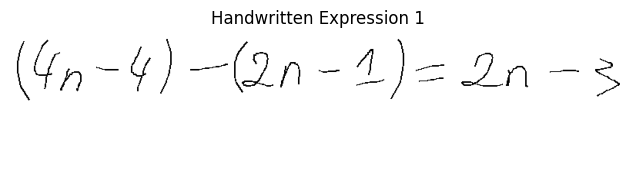


Ground Truth Label Graph:
4 Right n Right - Right 4 Right ) NoRel ( NoRel - NoRel 2 Right n Right - Right 1 Right ) NoRel ( NoRel = Right 2 Right n Right - Right 3

Predicted Label Graph:
( Right 4 Right n Right - Right 4 Right ) Right - Right ( Right 2 Right n Right - Right 1 Right ) Right = Right 2 Right n Right - Right 3

✗ NO MATCH


Test Example 2


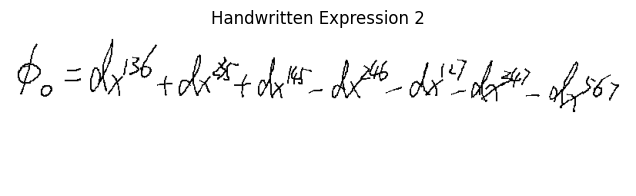


Ground Truth Label Graph:
\phi Sub 0 NoRel = Right d Right x Sup 1 Right 3 Right 6 NoRel + Right d Right x Sup 2 Right 3 Right 5 NoRel + Right d Right x Sup 1 Right 4 Right 5 NoRel - Right d Right x Sup 2 Right 4 Right 6 NoRel - Right d Right x Sup 1 Right 2 Right 7 NoRel - Right d Right x Sup 3 Right 4 Right 7 NoRel - Right d Right x Sup 5 Right 6 Right 7

Predicted Label Graph:
\phi Sub 0 NoRel = Right d Right x Sup 1 Right 3 Right 6 NoRel + Right d Right x Sup 1 Right 5 Right 5 NoRel + Right d Right x Sup 1 Right 4 Right 5 NoRel - Right d Right x Sup 2 Right 4 Right 6 NoRel - Right d Right x Sup 1 Right 7 NoRel - Right d Right x Sup 2 Right 4 Right 7 NoRel - Right d Right x Sup 5 Right 6 Right 7

✗ NO MATCH


Test Example 3


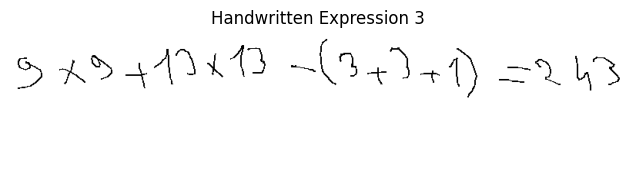


Ground Truth Label Graph:
9 Right \times Right 9 Right + Right 1 Right 3 Right \times Right 1 Right 3 Right - Right ( Right 3 Right + Right 3 Right + Right 1 Right ) Right = Right 2 Right 4 Right 3

Predicted Label Graph:
9 Right \times Right 9 Right + Right 1 Right 0 Right \times Right 1 Right 3 Right - Right ( Right 3 Right + Right ) Right + Right 1 Right ) Right = Right 2 Right 4 Right 3

✗ NO MATCH



In [24]:
# Visualize some test examples with images
import matplotlib.pyplot as plt

print("Visual Examples from Test Set:\n")

# Show 3 examples with images
for i in range(min(3, len(eval_results['results']))):
    result = eval_results['results'][i]
    
    print(f"\n{'='*60}")
    print(f"Test Example {i+1}")
    print(f"{'='*60}")
    
    # Display the handwritten image
    plt.figure(figsize=(10, 2))
    plt.imshow(test_dataset[result['index']]['image'])
    plt.axis('off')
    plt.title(f"Handwritten Expression {i+1}")
    plt.show()
    
    # Display ground truth label graph
    print("\nGround Truth Label Graph:")
    print(result['ground_truth'])
    
    # Display prediction label graph
    print("\nPredicted Label Graph:")
    print(result['prediction'])
    
    # Show match status
    if result['exact_match']:
        print("\n✓ EXACT MATCH")
    elif result['normalized_match']:
        print("\n≈ NORMALIZED MATCH (extra whitespace only)")
    else:
        print("\n✗ NO MATCH")
    print()

In [26]:

print("Running evaluation on FULL test set...")
full_eval_results = evaluate_on_test_set(model, tokenizer, test_dataset, num_samples=None)

print(f"\n{'='*70}")
print("FULL TEST SET EVALUATION RESULTS")
print(f"{'='*70}")
print(f"Exact Match Accuracy (strict):      {full_eval_results['exact_accuracy']:.2f}%")
print(f"  - Exact Matches: {full_eval_results['exact_matches']}/{full_eval_results['total_samples']}")
print(f"\nNormalized Accuracy (ignore spaces): {full_eval_results['normalized_accuracy']:.2f}%")
print(f"  - Normalized Matches: {full_eval_results['normalized_matches']}/{full_eval_results['total_samples']}")
print(f"\nNote: Normalized accuracy ignores whitespace differences.")
print(f"{'='*70}\n")

# Save results to file
import json
with open('test_results.json', 'w') as f:
    json.dump(full_eval_results, f, indent=2)
print("Results saved to test_results.json")

Running evaluation on FULL test set...
Evaluating on 1198 test samples...


  0%|          | 0/1198 [00:00<?, ?it/s]

100%|██████████| 1198/1198 [47:29<00:00,  2.38s/it] 


FULL TEST SET EVALUATION RESULTS
Exact Match Accuracy (strict):      28.38%
  - Exact Matches: 340/1198

Normalized Accuracy (ignore spaces): 28.38%
  - Normalized Matches: 340/1198

Note: Normalized accuracy ignores whitespace differences.

Results saved to test_results.json


### Saving to float16 for VLLM

We also support saving to `float16` directly. Select `merged_16bit` for float16. Use `push_to_hub_merged` to upload to your Hugging Face account! You can go to https://huggingface.co/settings/tokens for your personal tokens.

In [27]:
# Select ONLY 1 to save! (Both not needed!)

# Save locally to 16bit
if False: model.save_pretrained_merged("unsloth_finetune", tokenizer,)

# To export and save to your Hugging Face account
if False: model.push_to_hub_merged("YOUR_USERNAME/unsloth_finetune", tokenizer, token = "PUT_HERE")